# Chapter 8: Time-Varying Volatility
&copy; 2019 Kenneth Winston

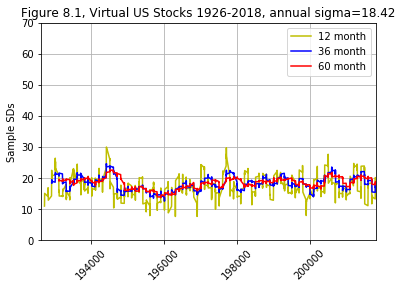

In [1]:
%matplotlib inline
import qrbook_funcs as qf
import random
import numpy as np
#Generate virtual reality for graph of standard deviations

#First get actual reality
Date,market_minus_rf,SMB,HML,RF=qf.getFamaFrench3()
ActualReality=qf.LogReturnConvert(market_minus_rf,RF)

#Compute overall monthly standard deviation
targetsd=np.std(ActualReality)

#Generate virtual reality with random normal draws with targetsd
VirtualReality=[]
random.seed(3.14159265)
for x in range(len(ActualReality)):
    VirtualReality.append(random.gauss(0,targetsd))

#Generate sample standard deviations for 3 lookback periodicities
lookbacks=[12,36,60]
SampleSd=qf.GenSampleSd(VirtualReality,lookbacks)

#Draw the graph with 3 lines for the 3 periodicities
colors=['y-','b-','r-']
tstr='Figure 8.1, Virtual US Stocks '+str(Date[0])[:4]
tstr+='-'+str(Date[len(Date)-1])[:4]
tstr+=', annual sigma=%.2f' % float(targetsd*np.sqrt(12))
qf.PlotSampleSd(tstr,Date,SampleSd,lookbacks,colors)

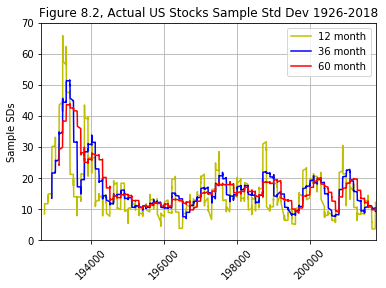

In [2]:
#Generate sample standard deviations
lookbacks=[12,36,60]
SampleSd=qf.GenSampleSd(ActualReality,lookbacks)

#Graph
colors=['y-','b-','r-']
tstr='Figure 8.2, Actual US Stocks Sample Std Dev '+str(Date[0])[:4]
tstr+='-'+str(Date[len(Date)-1])[:4]
qf.PlotSampleSd(tstr,Date,SampleSd,lookbacks,colors)

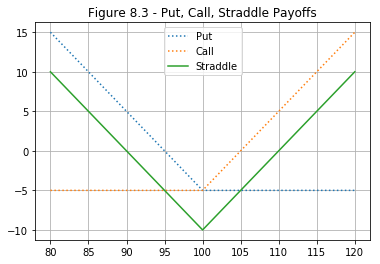

In [3]:
import matplotlib.pyplot as plt
#Draw graph showing payoff pattern of put,
#call and straddle

underprices=np.arange(80,121,1)

strike=100
cost=5
putprices=np.maximum(strike-underprices,0)-cost
callprices=np.maximum(underprices-strike,0)-cost
straddleprices=putprices+callprices
        
plt.plot(underprices,putprices,label='Put',linestyle=':')
plt.plot(underprices,callprices,label='Call',linestyle=':')
plt.plot(underprices,straddleprices,label='Straddle')
plt.title('Figure 8.3 - Put, Call, Straddle Payoffs') 
plt.legend()
plt.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

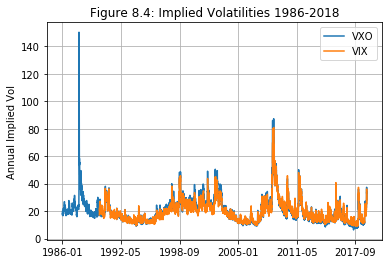

In [4]:
import pandas as pd
#Get VXO and  VIX from Fred and
#graph them.

lastday=qf.LastYearEnd()
seriesnames=['VXOCLS','VIXCLS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,
            enddate=lastday)

#Get rid of double nan's
vols=[]
vdates=[]
for i in range(len(ratematrix)):
    if pd.notna(ratematrix[i][0]) or pd.notna(ratematrix[i][1]):
        vols.append(ratematrix[i])
        vdates.append(cdates[i])

#vols now has VXO and VIX data where at least
#one of them is present.
x=range(len(vdates))
vxo=[row[0] for row in vols]
vix=[row[1] for row in vols]
plt.plot(x,vxo,label='VXO')
plt.plot(x,vix,label='VIX')
plt.title('Figure 8.4: Implied Volatilities '+vdates[0][:4]+'-'+vdates[len(vdates)-1][:4])

xskip=np.arange(0,len(vdates),1600)
tikskip=[vdates[x][:7] for x in xskip]
plt.xticks(xskip,tikskip)
plt.ylabel('Annual Implied Vol')
plt.legend()
plt.grid()
plt.show

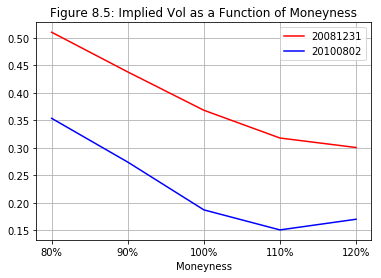

In [5]:
#Draw implied vols on two dates
moneyness=[.8,.9,1.,1.1,1.2] 
imp2008=[0.510000164, 0.437931821, \
         0.368329438,0.31789782,0.30067243]
imp2010=[0.353624894,0.274183277, \
         0.187416666,0.150996185,0.170348777]

plt.plot(moneyness,imp2008,label='20081231',color='r')
plt.plot(moneyness,imp2010,label='20100802',color='b')
plt.xlabel('Moneyness')
plt.xticks(moneyness,['{:.0%}'.format(m) for m in moneyness])
plt.title('Figure 8.5: Implied Vol as a Function of Moneyness')
plt.grid()
plt.legend()
plt.show()

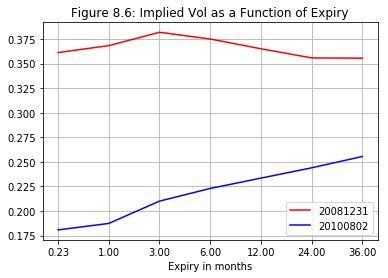

In [6]:
#Draw implied vols on two dates by expiry
expiry=[1./52.,1./12.,1./4.,1./2.,1.,2.,3.] 
months=['{0:.2f}'.format(12*e) for e in expiry]
imp2008=[.3612,.3683,.3819,.3750, \
         .3651,.3558,.3555]
imp2010=[.1808,.1874,.2101,.2230, \
         .2335,.2440,.2555]

plt.plot(range(len(expiry)),imp2008,label='20081231',color='r')
plt.plot(range(len(expiry)),imp2010,label='20100802',color='b')
plt.xlabel('Expiry in months')
plt.xticks(range(len(expiry)),months)
plt.title('Figure 8.6: Implied Vol as a Function of Expiry')
plt.grid()
plt.legend()
plt.show()

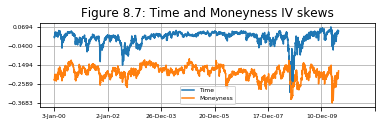

In [7]:
#Read time series of implied vol skews
#from csv file and graph them (time and
#moneyness skews)

file='IV skews.csv'
df=pd.read_csv(file)

#Change skew time series from strings to fractions
dates=df['Date']
timeskew=df['Time'].str.rstrip('%').astype('float')/100.0
moneyskew=df['Money'].str.rstrip('%').astype('float')/100.0

#Create a figure whose aspect ratio we can change
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(timeskew)),timeskew,label='Time')
ax.plot(range(len(moneyskew)),moneyskew,label='Moneyness')

ax.legend(loc='lower center',fontsize=6)
ax.grid()
plt.title('Figure 8.7: Time and Moneyness IV skews')
plt.xticks(range(0,len(timeskew)+500,500), \
          dates[dates.index % 500 == 0], \
          fontsize=6)
#Figure out size and spacing of y ticks
small=min(min(timeskew),min(moneyskew))
big=max(max(timeskew),max(moneyskew))
plt.yticks(np.arange(small,big+(big-small)/4,(big-small)/4), \
           fontsize=6)

ratio = 0.25   #x axis 4 times y axis
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.show()

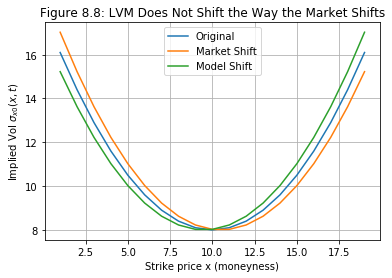

In [8]:
#Draw two smiles illustrating problem
#with LVM vs Market

strikes=np.arange(1,20)
original=[(s-10)**2/10+8 for s in strikes]
mktshift=[(s-.5-10)**2/10+8 for s in strikes]
modelshift=[(s+.5-10)**2/10+8 for s in strikes]

plt.plot(strikes,original,label='Original')
plt.plot(strikes,mktshift,label='Market Shift')
plt.plot(strikes,modelshift,label='Model Shift')

plt.ylabel('Implied Vol '+r'$σ_{x0}(x,t)$')
plt.xlabel('Strike price x (moneyness)')
plt.grid()
plt.legend()
plt.title('Figure 8.8: LVM Does Not Shift the Way the Market Shifts')
plt.show()

a=0.134
b=0.849
c=0.657


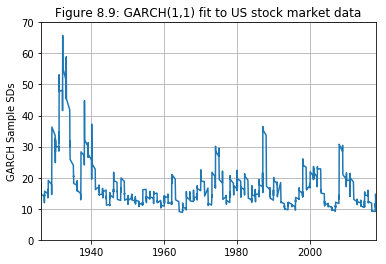

In [17]:
#fit GARCH(1,1) model
initparams=[.12,.85,.6]
a,b,c=qf.Garch11Fit(initparams,ActualReality)

#Display results
print("a=%.3f" % a)
print("b=%.3f" % b)
print("c=%.3f" % c)

#Draw graph
t=len(ActualReality)
minimal=10**(-20)
stdgarch=np.zeros(t)
stdgarch[0]=np.std(ActualReality)
overallmean=np.mean(ActualReality)
degarched=np.zeros(t)   #series to hold de-garched series y[t]/sigma[t]
degarched[0]=(ActualReality[0]-overallmean)/stdgarch[0]
#Compute GARCH(1,1) stddev's from data given parameters
for i in range(1,t):
    #Note offset - i-1 observation of data
    #is used for i estimate of std deviation
    previous=stdgarch[i-1]**2
    var=c+b*previous+\
        a*(ActualReality[i-1]-overallmean)**2
    stdgarch[i]=np.sqrt(var)
    degarched[i]=(ActualReality[i]-overallmean)/stdgarch[i]

#Annualize
stdgarch*=np.sqrt(12)

#Just show years
Year=[d/100 for d in Date]
    
plt.plot(Year,stdgarch)
plt.grid()
plt.title('Figure 8.9: GARCH(1,1) fit to US stock market data')
plt.ylabel('GARCH Sample SDs')
plt.axis([min(Year),max(Year),0,70])
plt.show();

In [11]:
print('Monthly equilibrium variance c/(1-a-b):',c/(1-a-b))
print('Annual equivalent:',np.sqrt(c*12/(1-a-b)))

Monthly equilibrium variance c/(1-a-b): 40.23918972754326
Annual equivalent: 21.974309471073695


In [20]:
#Compute before and after excess kurtosis
from scipy import stats
kurt_orig=stats.kurtosis(ActualReality,fisher=True)
kurt_degarch=stats.kurtosis(degarched,fisher=True)
print("Excess kurtois before and after deGarching:",kurt_orig,kurt_degarch)

Excess kurtois before and after deGarching: 6.903189569528342 2.308065895077707


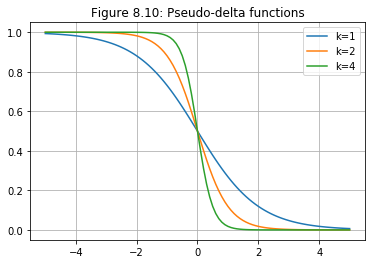

In [10]:
#Draw graph of pseudo-delta functions
xs=np.arange(-5,5.1,.1)
ks=[1,2,4]
for k in ks:
    ys=[1/(1+np.exp(k*x)) for x in xs]
    plt.plot(xs,ys,label='k='+str(k))

plt.legend()
plt.title('Figure 8.10: Pseudo-delta functions')
plt.grid()
plt.show()